In [2]:
from ase.db import connect
from ase.io import Trajectory
from ocp_utils import adjust_energy
import numpy as np
 
with connect('OCH3_63/OCH3_63_preview_out.db') as db_out, connect('OCH3_63/OCH3_63_preview.db') as db_:
 
    for row in db_out.select():
        if row.formula=='':
            idx = str(row.id).zfill(3)
            atoms = Trajectory(f'calc/OCH3_63_preview_{idx}.traj')[-1]
            fmax = np.max(np.linalg.norm(atoms.get_forces(),axis=1))
            if fmax<0.075:
                adj_e, pred_e, node_e = adjust_energy(atoms)
                del atoms.calc
                row_=db_.get(row.id)
                db_out.write(atoms, id=row.id, idx=row.id,adj_energy=adj_e,ocp_energy=pred_e,**{'slab_idx': row_.slab_idx, 'site_idx': row_.site_idx},data={'node_energies': node_e})
            else:
                print(row.id)
                break

FileNotFoundError: [Errno 2] No such file or directory: 'calc/OCH3_63_preview_127.traj'

In [12]:
from ase.db import connect
from ase.db import connect
from ase.io import Trajectory
from ocp_utils import adjust_energy
import numpy as np
database_path = 'OCH3_63/OCH3_63_preview_out.db'  # Replace with the actual path to your database file

with connect(database_path) as db:
    for row in db.select():  # Loop through all data rows
        energy = row.get('adj_energy', None)
        atoms = db.get_atoms(row.id)
        ocp_energy = row.ocp_energy

        # Print energy and atoms information for each row
        print(f"Entry ID: {row.id}")
        print(f"Energy: {energy}")
        print(f"OCP Energy: {ocp_energy}")
        print(f"Atoms: {atoms}")

Entry ID: 1
Energy: -0.5198261514306068
OCP Energy: -0.42100346088409424
Atoms: Atoms(symbols='CuZn2CuPtCuPdZnAg3ZnPtZn2PtCuPtAgPdAgZnCu2AuPtCuPdAgPd3ZnPdAuCuPdAgPd2AuAgAu2PdOCH3', pbc=[True, True, False], cell=[[8.719310148585278, 0.0, 0.0], [4.359655074292639, 7.551144092150318, 0.0], [0.0, 0.0, 29.289562682893944]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]))
Entry ID: 2
Energy: -0.14073234796524048
OCP Energy: 0.08374863862991333
Atoms: Atoms(symbols='CuZn2CuPtCuPdZnAg3ZnPtZn2PtCuPtAgPdAgZnCu2AuPtCuPdAgPd3ZnPdAuCuPdAgPd2AuAgAu2PdOCH3', pbc=[True, True, False], cell=[[8.719310148585278, 0.0, 0.0], [4.359655074292639, 7.551144092150318, 0.0], [0.0, 0.0, 29.289562682893944]], tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]))
Entry ID: 3
Energy: -0.5472520887851715
OCP Energy: -0.4565592110157013
Atoms: Atoms(symbols='CuZn2CuPtCuPdZnAg3ZnPtZn2PtCuPtAgPdAgZnCu2AuPtCuPdAgPd3ZnP

AttributeError: 'AtomsRow' object has no attribute 'ocp_energy'

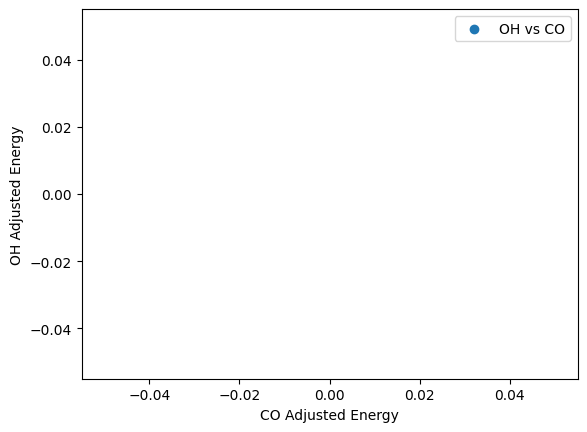

In [3]:
import matplotlib.pyplot as plt
from ase.db import connect

# Initialize lists to store data
ids_oh = []
energies_oh = []
atoms_oh = []

ids_CO = []
energies_CO = []
atoms_CO = []


    
# Extract data from 'OH' database
with connect('OH/OH_preview_out.db') as db_oh:
    for row in db_oh.select():
        ids_oh.append(row.id)
        energies_oh.append(row.get('adj_energy'))
        atoms_oh.append(db_oh.get_atoms(row.id))

# Extract data from 'OCH3_63' database
with connect('CO/COpreview_out.db') as db_CO:
    for row in db_CO.select():
        ids_CO.append(row.id)
        energies_CO.append(row.get('adj_energy'))
        atoms_CO.append(db_CO.get_atoms(row.id))

# Ensure that the same IDs are present in both databases
common_ids = list(set(ids_oh) & set(ids_CO))

# Filter data for common IDs
energies_oh_common = [energy for id, energy in zip(ids_oh, energies_oh) if id in common_ids]
energies_CO_common = [energy for id, energy in zip(ids_CO, energies_CO) if id in common_ids]

# Create a scatter plot with swapped axes
plt.scatter(energies_CO_common, energies_oh_common, label='OH vs CO', marker='o')
plt.xlabel('CO Adjusted Energy')
plt.ylabel('OH Adjusted Energy')
plt.legend()
plt.show()



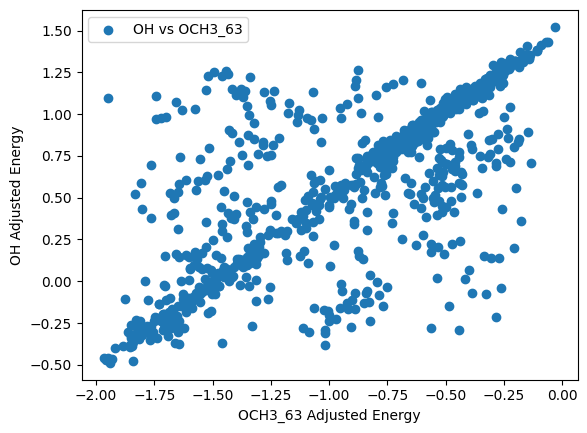

In [10]:
import matplotlib.pyplot as plt
from ase.db import connect

# Initialize lists to store data
ids_oh = []
energies_oh = []
atoms_oh = []

ids_och3_63 = []
energies_och3_63 = []
atoms_och3_63 = []

# Extract data from 'OH' database
with connect('OH/OH_preview_out.db') as db_oh:
    for row in db_oh.select():
        ids_oh.append(row.id)
        energies_oh.append(row.get('adj_energy'))
        atoms_oh.append(db_oh.get_atoms(row.id))

# Extract data from 'OCH3_63' database
with connect('OCH3_63/OCH3_63_preview_out.db') as db_och3_63:
    for row in db_och3_63.select():
        ids_och3_63.append(row.id)
        energies_och3_63.append(row.get('adj_energy'))
        atoms_och3_63.append(db_och3_63.get_atoms(row.id))

# Ensure that the same IDs are present in both databases
common_ids = list(set(ids_oh) & set(ids_och3_63))

# Filter data for common IDs
energies_oh_common = [energy for id, energy in zip(ids_oh, energies_oh) if id in common_ids]
energies_och3_63_common = [energy for id, energy in zip(ids_och3_63, energies_och3_63) if id in common_ids]

# Create a scatter plot with swapped axes
plt.scatter(energies_och3_63_common, energies_oh_common, label='OH vs OCH3_63', marker='o')
plt.xlabel('OCH3_63 Adjusted Energy')
plt.ylabel('OH Adjusted Energy')
plt.legend()
plt.show()

